In [1]:
from sentence_transformers import SentenceTransformer

In [2]:
from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

In [3]:
import multimodalModel

In [4]:
path = '..\\data\\clean\\des_b64_wit_kag_0_of_48.tsv'

In [5]:
embedding_model = SentenceTransformer("clip-ViT-B-32")

c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


In [6]:
model = multimodalModel.MultimodalModel(path, embedding_model, n_clusters=5)

In [7]:
model.compute_embeddings()

100%|██████████| 18/18 [00:14<00:00,  1.22it/s]


In [8]:
model.fit()

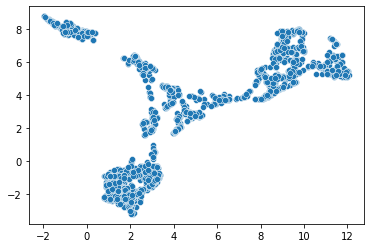

In [9]:
model.plot_embedding()

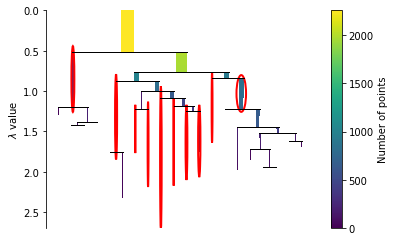

In [10]:
model.plot_clusters()

In [11]:
model.compute_c_tf_idf()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 16220/16220 [00:00<00:00, 201008.15it/s]


c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\ipyplot\_utils.py:95: FutureWarning:

The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.




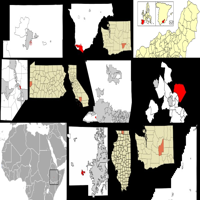
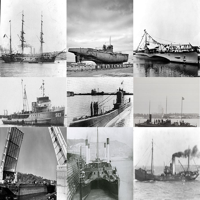
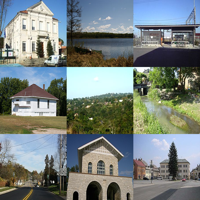
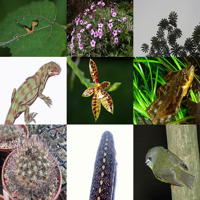
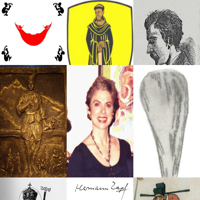


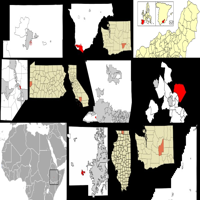
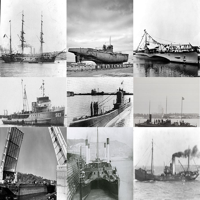
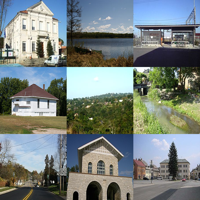
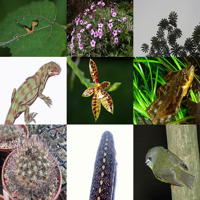
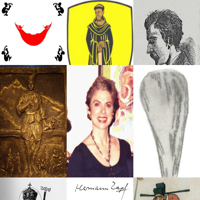

In [12]:
model.find_image_represenatives()
model.plot_images()


In [13]:
model.classes[0]

{'vocab': {'wachee',
  'buffalo',
  'minister',
  'kansas',
  'familial',
  'kaikoura',
  'peninsula',
  'ottenbttel',
  'earliest',
  'kmh',
  'leelanau',
  'sweden',
  'rhinebeck',
  'confluence',
  'chief',
  'teen',
  'puerto',
  'migrate',
  'shanxi',
  'offshore',
  'crater',
  'division',
  'soto',
  'gelderland',
  'exacerbated',
  'salmon',
  'graduates',
  'surili',
  'act',
  'pitch',
  'szekely',
  'buried',
  'cultures',
  'fired',
  'montevideo',
  'waters',
  'members',
  'bihor',
  'senegalia',
  'mindanao',
  'phutthaisong',
  'primarily',
  'affected',
  'divisions',
  'exact',
  'homeland',
  'yorkers',
  'braganamiranda',
  'places',
  'fraser',
  'officers',
  'massive',
  'gaines',
  'vienna',
  'kamchatka',
  'get',
  'threatened',
  'even',
  'caroline',
  'williamsfield',
  'founding',
  'russia',
  'arrondissement',
  'twelve',
  'portion',
  'mitrovica',
  'vincent',
  'queensland',
  'barbara',
  'gulf',
  'morecambe',
  'sixteen',
  'shoalhaven',
  'teenage